In [ ]:
tos

<center>
    
# Diplo 2021
# Árboles de decisión

    Práctico: A- G. Flesia

# Algo de paquetes

In [32]:
# Manejo de dataframes
import pandas as pd

# operaciones numéricas
import numpy as np

#Graficos
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Métodos de aprendizaje automático
import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score

#datos 
from sklearn import datasets
from sklearn.datasets import load_iris


# Arboles de decisión
En esta sección, vamos a ver cómo funciona un árbol de decisión y luego vamos a utilizar el paquete scikit-learn para realizar un árbol de decisión.

Haremos este ejemplo sobre una base de datos que armaremos en un dataframe utilizando el paquete `Pandas`.

In [33]:
import pandas as pd

data = pd.DataFrame({"Dientes":[True,True,True,False,True,True,True,True,True,False],
                     "Pelo":[True,True,False,True,True,True,False,False,True,False],
                     "Respira":[True,True,True,True,True,True,False,True,True,True],
                     "Piernas":[True,True,False,True,True,True,False,False,True,True],
                     "Especie":["Mamifero","Mamifero","Reptil","Mamifero","Mamifero","Mamifero","Reptil","Reptil","Mamifero","Reptil"]
                     }, 
                    columns=["Dientes","Pelo","Respira","Piernas","Especie"]
                    )

features = data[["Dientes","Pelo","Respira","Piernas"]]
target = data["Especie"]

data

,Dientes,Pelo,Respira,Piernas,Especie
0,True,True,True,True,Mamifero
1,True,True,True,True,Mamifero
2,True,False,True,False,Reptil
3,False,True,True,True,Mamifero
4,True,True,True,True,Mamifero
5,True,True,True,True,Mamifero
6,True,False,False,False,Reptil
7,True,False,True,False,Reptil
8,True,True,True,True,Mamifero
9,False,False,True,True,Reptil


In [34]:
features2= features.astype('int64')

In [35]:
features

,Dientes,Pelo,Respira,Piernas
0,True,True,True,True
1,True,True,True,True
2,True,False,True,False
3,False,True,True,True
4,True,True,True,True
5,True,True,True,True
6,True,False,False,False
7,True,False,True,False
8,True,True,True,True
9,False,False,True,True


Vemos que la base de datos cuenta con 10 animales, sobre los cuales se ha observado si presentan dientes, si tienen pelo, si respiran y si tienen piernas. La variable dependiente en este caso es la especie. Se desea saber si, a partir de las variables registradas, se puede generar un clasificador que determine si un animal es mamífero o reptil. Para esto utilizaremos un árbol de decisión.

## Implementación

La implementación en python es sencilla. Primero, lo implementaremos con scikit-learn y luego iremos entendiendo qué está haciendo el método de este paquete.

In [36]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy').fit(features,target)
print("The prediction accuracy is: ",model.score(features,target)*100,"%")
# prediction = model.predict(test_features)

The prediction accuracy is:  100.0 %


Podemos graficar el árbol de decisión:

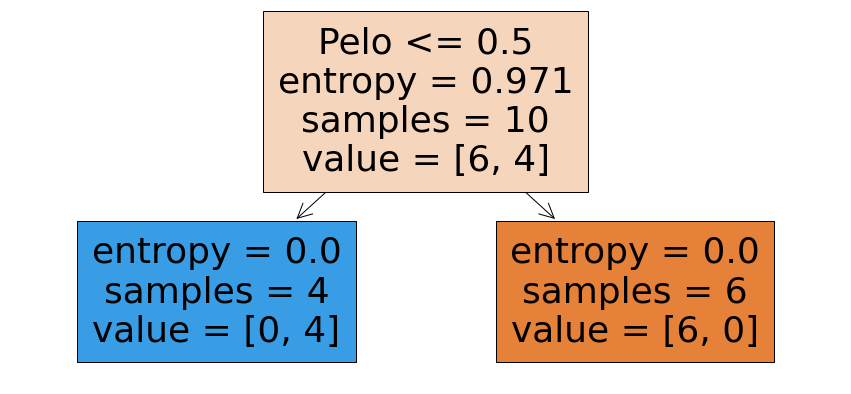

In [71]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,7))
tree.plot_tree(model,feature_names=["Dientes","Pelo","Respira","Piernas"],filled=True)
plt.show()

Arrmemos unos nuevos datos y veamos como los clasifica

In [55]:
#recordemos que las variables son ["Dientes","Pelo","Respira","Piernas"]
animal_raro_1 = [0,0,0,0]
animal_raro_2 = [1,1,0,0]
model.predict([animal_raro_1])


array(['Reptil'], dtype=object)

In [56]:
model.predict_proba([animal_raro_1])

array([[0., 1.]])

In [57]:
model.predict([animal_raro_2])

array(['Mamifero'], dtype=object)

In [58]:
model.predict_proba([animal_raro_2])

array([[1., 0.]])

## Ahora entendamos un poco


Entropía $H$:

Medida de impureza de un conjunto de datos. La ganancia de información se refleja en un decrecimiento en la medida de entropía.

Definición: 

$H(Q_m) = - \sum_{k \in target} P_{mk} log_2(P_{mk})$,

donde $Q_m$ son los datos en el nodo $m$ del árbol, la suma se extiende sobre los posibles valores $k$ de la variable respuesta y $P_{mk}$ es la probabilidad condicional que la variable respuesta tome el valor $k$ dado a que estamos en el nodo $m$

In [20]:
def entropia(P):
    '''
    Función que calcula medida de entropía dada una probabilidad P.
    '''
    entropy = - P * np.log2(P)
    return entropy

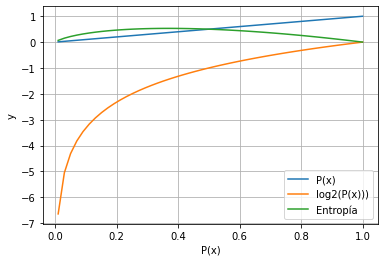

In [21]:
import numpy as np

#Declaramos la figura
plt.figure()

#Agregamos contenido
x = np.linspace(0.01,1)
plt.plot(x,x,label='P(x)')
plt.plot(x,np.log2(x),label='log2(P(x)))')
plt.plot(x,entropia(x),label='Entropía')

#Agregamos formato
plt.xlabel("P(x)") #Agrega nombre al eje x
plt.ylabel("y") #Agrega nombre al eje y
plt.grid() #muestra la grilla
plt.legend() #muestra las leyendas, definidas con "label" en cada curva.

#mostramos y cerramos la figura
plt.show()

In [ ]:
data

,Dientes,Pelo,Respira,Piernas,Especie
0,True,True,True,True,Mamifero
1,True,True,True,True,Mamifero
2,True,False,True,False,Reptil
3,False,True,True,True,Mamifero
4,True,True,True,True,Mamifero
5,True,True,True,True,Mamifero
6,True,False,False,False,Reptil
7,True,False,True,False,Reptil
8,True,True,True,True,Mamifero
9,False,False,True,True,Reptil


Para utilizar la definición de entropía debemos tener una función que estime la probabilidad con la frecuencia relativa.  

In [22]:
def calc_prob(data):
    '''
    Función que calcula la probabilidad de cada clase.
    data : columna categórica de un dataframe de pandas.
    '''
    return data.value_counts()/data.shape[0]

    
probabilidades = calc_prob(data['Especie'])
probabilidades

Mamifero    0.6
Reptil      0.4
Name: Especie, dtype: float64

Con esta función, podemos calcular la entropía total de los datos en el primer nodo:

In [23]:
entropia_total = entropia(probabilidades[0]) + entropia(probabilidades[1])


#Es lo mismo que:


entropia_total = np.sum([entropia(pi) for pi in probabilidades])

print(f'La entropia total es {round(entropia_total,3)}')

La entropia total es 0.971


Podemos ver que este valor coincide con el que declara el método `DecisionTreeClassifier` de `scikit-learn` en el árbol de decisión que obtuvimos anteriormente.


Ahora, **¿Por qué eligió la variable pelo para ramificar? ¿Cómo lo hizo?**

Para responder esto, calculemos la ganancia de entropía para cada variable descriptiva. Esto lo podemos pensar como:

$GananciaEntropia(variable_d) = Entropia_{total} - Entropia(variable_d)$

Lo que se puede escribir como:

$GananciaEntropia(variable_d) = Entropia_{total} - \sum_{t \in variable_d} P(variable_d=t) * H(variable_d=t) $

que es igual a:

$GananciaEntropia(variable_d) = Entropia_{total} - \sum_{t \in variable_d} P(variable_d=t) * (-\sum_{k \in target} P(target=k \cap variable_d = t)) * \log_2(P((target=k \cap variable_d = t)))$

In [ ]:
data[data.Dientes == 1]

,Dientes,Pelo,Respira,Piernas,Especie
0,True,True,True,True,Mamifero
1,True,True,True,True,Mamifero
2,True,False,True,False,Reptil
4,True,True,True,True,Mamifero
5,True,True,True,True,Mamifero
6,True,False,False,False,Reptil
7,True,False,True,False,Reptil
8,True,True,True,True,Mamifero


In [ ]:
data[data.Dientes == 0]

,Dientes,Pelo,Respira,Piernas,Especie
3,False,True,True,True,Mamifero
9,False,False,True,True,Reptil


In [ ]:
#Probabilidades de ser mamífero o reptil dado que tiene dientes

P_especie_dientes = calc_prob(data[data.Dientes == 1]['Especie'])

#Probabilidades de ser mamífero o reptil dado que no tiene dientes

P_especie_nodientes = calc_prob(data[data.Dientes == 0]['Especie'])

#Probabilidad de tener dientes

P_dientes = calc_prob(data['Dientes'])

#entropias
entropia_dientes = P_dientes[1] * (entropia(P_especie_dientes[0]) + entropia(P_especie_dientes[1])) \
                +  P_dientes[0] * (entropia(P_especie_nodientes[0]) + entropia(P_especie_nodientes[1]))

entropia_dientes

0.963547202339972

In [ ]:
#información ganada
entropia_total - entropia_dientes 

0.007403392114696539

In [ ]:
def ganancia_de_info(var,data=data,respuesta='Especie'):
    '''
    Función que calcula la ganancia de información utilizando la entropía como medida
    de información.
    
    variables de entrada:
    var (str): nombre de la variable sobre la cuál vamos a calcular la ganancia de la información.
    data (dataFrame): el conjunto de datos de donde sacar la varianza
    respuesta (str): nombre de la variable respuesta
    
    Devuelve la ganancia de información (float)
    '''
    probabilidades = calc_prob(data[respuesta])

    entropia_total = np.sum([entropia(pi) for pi in probabilidades])

    P_especie_var = calc_prob(data[respuesta][data[var] == 1])

    P_especie_novar = calc_prob(data[respuesta][data[var] == 0])
    
    P_var = calc_prob(data[var])
    
    entropia_var = P_var[1] * np.sum([entropia(pi) for pi in P_especie_var]) \
                    +  P_var[0] * np.sum([entropia(pi) for pi in P_especie_novar])
    return entropia_total - entropia_var

print(f'ganancia de información variable dientes: {ganancia_de_info("Dientes"):.3f}')
print(f'ganancia de información variable pelo: {ganancia_de_info("Pelo"):.3f}')
print(f'ganancia de información variable respira: {ganancia_de_info("Respira"):.3f}')
print(f'ganancia de información variable piernas: {ganancia_de_info("Piernas"):.3f}')

ganancia de información variable dientes: 0.007
ganancia de información variable pelo: 0.971
ganancia de información variable respira: 0.144
ganancia de información variable piernas: 0.557


## Ejemplo de árbol de decisión más complejo: datos Iris

[scikit-learn](https://scikit-learn.org/stable/modules/tree.html)

['setosa' 'versicolor' 'virginica']
The prediction accuracy is:  100.0 %


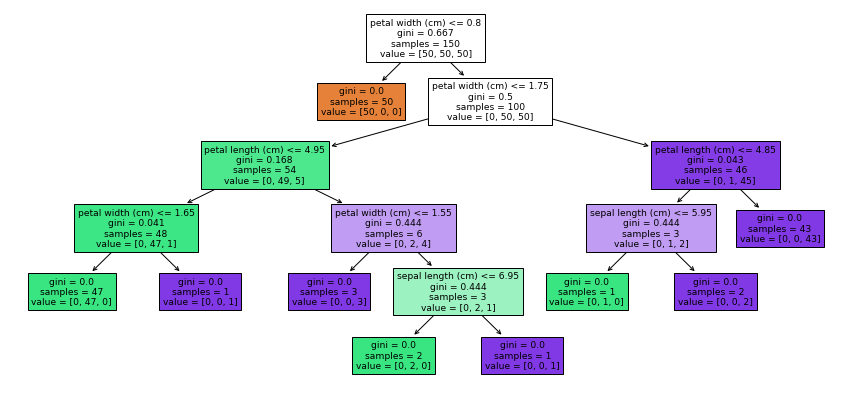

In [39]:
#importamos lo necesario
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
#cargamos los datos
iris = load_iris()
X, y = iris.data, iris.target

print(iris.target_names)
#armamos el árbol de decisión
clf = tree.DecisionTreeClassifier(random_state=1)
clf = clf.fit(X, y)

print("The prediction accuracy is: ",clf.score(X,y)*100,"%")
#graficamos
plt.figure(figsize=(15,7))
tree.plot_tree(clf,
               feature_names=iris.feature_names,
               filled=True)
plt.show()

In [40]:
#armamos dataframe para visualizar
df = pd.DataFrame(X,columns=iris.feature_names)
df['Especie'] = y
df['Especie'].replace({0:'setosa', 1:'versicolor', 2:'virginica'},
                      inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Especie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Verificamos

In [41]:
condicion_logica_1 = df['petal width (cm)']>=0.8
condicion_logica_2 = df['petal width (cm)']>=1.75
df[condicion_logica_1 & condicion_logica_2].shape

(46, 5)

Podemos predecir la especie de una nueva observación ficticia. Para poner unos valores razonables, podemos primero ver las distribuciones de las variables y luego elegir valores acorde a las distribuciones. 

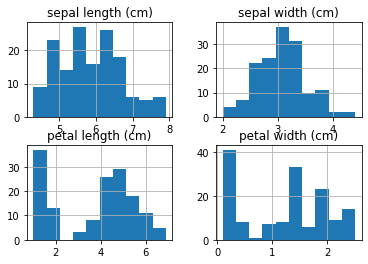

In [42]:
df.hist()
plt.show()

In [43]:
#Recordar orden de entrada: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
clf.predict_proba([[6.0,3.0,4.2,1.2]])
#Recordar orden de salida: ['setosa' 'versicolor' 'virginica']

array([[0., 1., 0.]])

Nuestro árbol de decisión, basándose en la estructura de los datos al entrenarse, predice que la nueva observación corresponde a la especie versicolor.